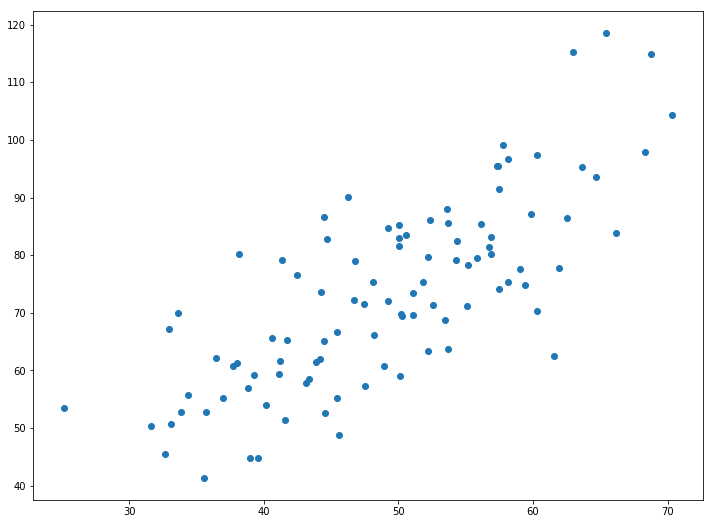

In [1]:
# Making the imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('../01.Linear_Regression_with_Gradient_Descent/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [2]:
# Getting input size
print(X.shape)
n = X.shape[0]
n

(99,)


99

In [4]:
# Random Initialization [OPTIONAL]
# We use `m` but think it like, `theta`, `beta`, `a` etc.
# See different notations above
# https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d
# https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf
# https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-5-974/
m = np.random.rand(n)
c = np.zeros(n)
print(m[:10])
print(c[:10])

[0.57757091 0.74992028 0.43861941 0.05755531 0.9742131  0.64261911
 0.44603364 0.844431   0.39234649 0.94279833]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
%%time

# Same here random initialization
m = np.random.rand(n) # Random m
c = np.random.rand(n) # Random c

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

for _ in range(epochs):
    # Initializing place holders with zeros for each iteration
    D_m = 0
    D_c = 0
    D_m_sum = 0
    D_c_sum = 0
    for i in range(n):
        # Calculating predicted y_hat for each m and c
        y_hat = m[i]*X[i] + c[i]
        # Calculating partial derivatives again for each of m and c's
        D_m += X[i]*(Y[i] - y_hat)
        D_c += Y[i] - y_hat
    # Final derivative calculation
    D_m_sum = (-2/n)*D_m
    D_c_sum = (-2/n)*D_c
    # Applying Gradient Descent for each of m and c
    for i in range(n):   
        m[i] = m[i] - L*D_m_sum
        c[i] = c[i] - L*D_c_sum

# At the end we will have random m and c values with minimized errors
print(m[:10])
print(c[:10])

[1.62863228 1.59134479 1.60602147 1.55306847 1.39068612 1.87398316
 1.20486182 1.72307796 1.29216686 1.08805922]
[2.68644553 2.81723298 2.02135313 2.27780992 2.11159318 2.51007732
 2.43384236 2.47595035 2.34762053 2.51903049]
CPU times: user 31.9 s, sys: 27 µs, total: 31.9 s
Wall time: 31.9 s


In [17]:
%%time
# hypothesis for all the samples For Loop
Y_pred = []

# Getting the mean of m and c
m_norm = np.mean(m)
c_norm = np.mean(c)
print(m_norm)
print(c_norm)
for i in range(n):
    # Applying calculated mean of m and c to each X values to get predicted Y values
    y_hat = m_norm*X[i] + c_norm
    Y_pred.append(y_hat)

print(Y[:10])
print(Y_pred[:10])

1.4236266549184244
2.4922536829430673
0    68.777596
1    62.562382
2    71.546632
3    87.230925
4    78.211518
5    79.641973
6    59.171489
7    75.331242
8    71.300880
9    55.165677
Name: 31.70700584656992, dtype: float64
[78.55207599181658, 90.08851145491289, 70.07983972632617, 87.64393072215728, 80.99414291956742, 76.82235915516056, 58.440164355717194, 70.97587327130644, 77.30385495996711, 67.15299217652958]
CPU times: user 3.97 ms, sys: 0 ns, total: 3.97 ms
Wall time: 3.84 ms


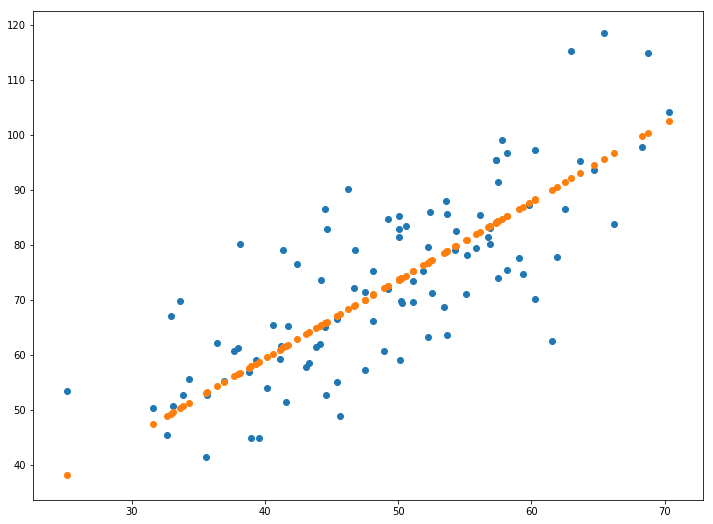

In [18]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.scatter(X, Y)
plt.scatter(X, Y_pred)
plt.show()